In [1]:
#Import tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 8.4 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115441 sha256=22b5bac1bfaeb8f3d3496d1e52268b5f7a3bab2f2680cc6facd4ae80483893d0
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
train_images =(np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images =(np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
test_labels = (train_labels).astype(np.int64)


11490434/11490434 [==============================] - 0s 0us/step


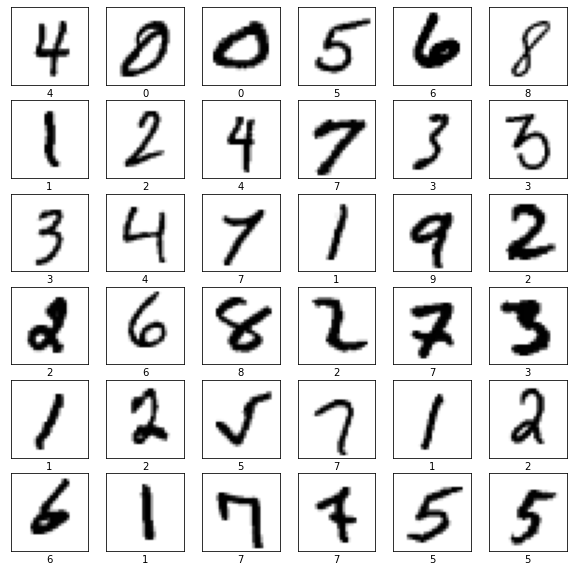

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)

for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])


In [4]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)

  ])
  return fc_model

model = build_fc_model()

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])


In [6]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE =64
EPOCHES =5
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHES)


Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.3749 - accuracy: 0.8964
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2027 - accuracy: 0.9419
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1533 - accuracy: 0.9553
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1235 - accuracy: 0.9637
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1033 - accuracy: 0.9703


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: ', test_acc)

1875/1875 [==============================] - 5s 3ms/step - loss: 2.3929 - accuracy: 0.0904
Test accuracy:  0.09035000205039978


In [8]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation= tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),

      tf.keras.layers.Dense(128, activation = tf.nn.softmax)

  ])

  return cnn_model

cnn_model = build_cnn_model()
  # Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

1/1 [==============================] - 0s 219ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 

In [9]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [10]:
cnn_model.fit(train_images, train_labels, batch_size =BATCH_SIZE, epochs= EPOCHES)


Epoch 1/5
938/938 [==============================] - 39s 42ms/step - loss: 0.2637 - accuracy: 0.9239
Epoch 2/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0669 - accuracy: 0.9796
Epoch 3/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0481 - accuracy: 0.9850
Epoch 4/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0376 - accuracy: 0.9884
Epoch 5/5
938/938 [==============================] - 41s 43ms/step - loss: 0.0289 - accuracy: 0.9911


In [11]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

1875/1875 [==============================] - 17s 9ms/step - loss: 4.7356 - accuracy: 0.1124
Test accuracy: 0.11236666887998581


In [12]:
predictions = cnn_model.predict(test_images)
predictions[0]

1875/1875 [==============================] - 18s 10ms/step


array([0.00855274, 0.00991079, 0.00852685, 0.00859252, 0.00831366,
       0.00918538, 0.00847135, 0.00912989, 0.0083099 , 0.00868411,
       0.00778304, 0.00768243, 0.00777069, 0.0078561 , 0.00778248,
       0.0078715 , 0.00756444, 0.00781871, 0.00779957, 0.00778585,
       0.00758692, 0.0076844 , 0.00773202, 0.00774076, 0.00778243,
       0.00782382, 0.00768846, 0.00774615, 0.00782299, 0.00768718,
       0.00755392, 0.00773465, 0.00773312, 0.00766643, 0.00778758,
       0.00767494, 0.00773215, 0.00767318, 0.00779267, 0.00769349,
       0.00752094, 0.00758343, 0.00788351, 0.00783554, 0.00760318,
       0.00763979, 0.00788886, 0.00755827, 0.00756327, 0.00783618,
       0.0076962 , 0.00775221, 0.00783623, 0.0076873 , 0.00784484,
       0.00787859, 0.00770597, 0.00780281, 0.00758441, 0.00787998,
       0.0077888 , 0.00765795, 0.00780874, 0.00775224, 0.00780035,
       0.00776274, 0.00779629, 0.00775058, 0.00764306, 0.00771309,
       0.00769301, 0.0078456 , 0.00772949, 0.00763736, 0.00781

In [13]:
prediction = np.argmax(predictions[0])

Label of this digit is: 5


TypeError: ignored

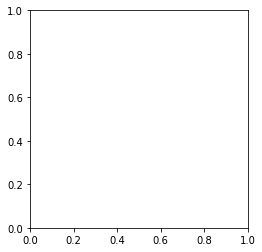

In [14]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

ValueError: ignored

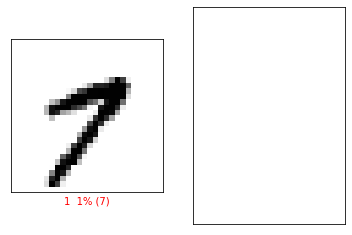

In [15]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

ValueError: ignored

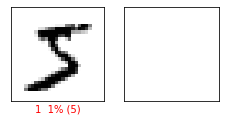

In [16]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

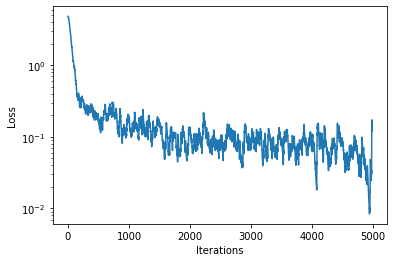

100%|██████████| 5000/5000 [02:18<00:00, 36.10it/s]


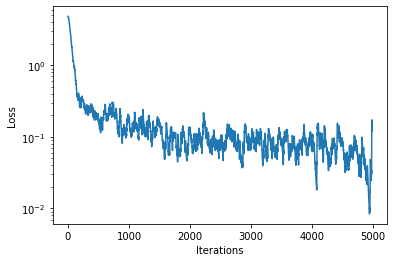

In [18]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = cnn_model(images)
    # logits = # TODO

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
    # loss_value = tf.keras.backend.sparse_categorical_crossentropy() # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.''' 
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  # grads = # TODO
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
